<a href="https://colab.research.google.com/github/Kendi-Nceene/Data-analysis-for-Financial-Inclusion-in-East-Africa/blob/main/Data_analysis_for_Financial_Inclusion_in_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Defining the question**.

**a)Specifying the question**

Predict which individuals are most likely to have or use a bank account.


**b)Defining metric success**

-Get to predict which individuals are most likely to have or use a bank account.

-Get the indicators of Financial inclusion in the 3 countries.

**c)Understanding the context**
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

Doing the research will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**d)Recording the experimental design**
1.Reading the Data

2.Checking the Data

3.External Data Source Validation

4.Tidying the Dataset

5.Cental measures of Dispersions

6.Exploratory Analysis

7.Implementing the Solution

8.Challenging the solution

9.Follow-up questions

**e)Data Relevance**

All the variables given are releveant to know the bank accounts predictions.

**2.Reading the data**

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

In [165]:
#reading the data filem provided
df = pd.read_csv('http://bit.ly/FinancialDataset')

3 Checking the data

In [166]:
#Determining the number of records in our dataset
df.shape


(23524, 13)

In [167]:
#preview the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [168]:
#preview the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [169]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

**4. External Data Source Validation**

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

**5.Tidying the Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


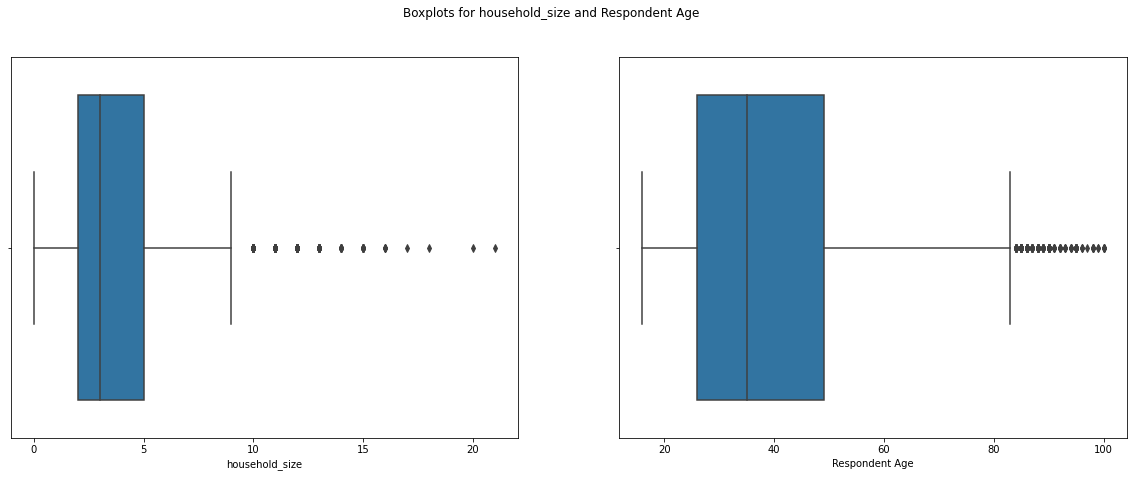

In [170]:
#checking outliers
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Boxplots for household_size and Respondent Age')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()
#By observation there are outliers in the data

In [171]:
#Checking for Anomalies
 #finding interquantile range of household_size
q1 = df['household_size'].quantile(.25)
q3= df['household_size'].quantile(.75)
iqr = q3 - q1
iqr
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
print(l_bound,u_bound)

-2.5 9.5


In [172]:
#Checking for Anomalies
 #finding interquantile range of household_size
q1 = df['Respondent Age'].quantile(.25)
q3= df['Respondent Age'].quantile(.75)
iqr = q3 - q1
iqr
#finding the end of the whiskers in the box and whisker
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
print(l_bound,u_bound)

-8.5 83.5


In [173]:
#Identifying for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [174]:
#Dealing with missing values
df.dropna(axis = 0,how ='any',inplace =True)


In [175]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [176]:
#other data cleaning procedures
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23343, dtype: bool

**6.Exploratory Analysis**

In [177]:
#Calculating measures of central tendancy
#Doing some exploration data analysis
describe= df.describe()

In [178]:
#finding mode of household-size and respondent age
print(df['household_size'].mode())
print(df['Respondent Age'].mode())

0    2.0
dtype: float64
0    30.0
dtype: float64


In [179]:
#finding mean of household-size and respondent age
print(df['household_size'].mean())
print(df['Respondent Age'].mean())

3.6886432763569377
38.80550914621085


In [180]:
#finding median of household-size and respondent age
print(df['household_size'].median())
print(df['Respondent Age'].median())

3.0
35.0


**Univariate analysis**

In [181]:
#finding interquantile range of household_size
max = df['household_size'].max()
min= df['household_size'].min()
range = max- min
range

21.0

In [182]:
#finding interquantile range of Respondent age
max = df['Respondent Age'].max()
min= df['Respondent Age'].min()
range = max- min
range

84.0

In [183]:
# Calculating  measures of dispersion 
# Calculating the variance and standard deviation
print(df['household_size'].var())
print(df['Respondent Age'].var())
print(df['household_size'].std())
print(df['Respondent Age'].std())

5.20379827489179
272.90390761391353
2.2811835250351495
16.51980349804178


In [184]:
# Calculating skewness and kurtosis 
print(df['household_size'].skew())
print(df['Respondent Age'].skew())
print(df['household_size'].kurt())
print(df['Respondent Age'].kurt())

0.9741086837897069
0.840661747532081
1.1538690689335573
0.09844652254807196


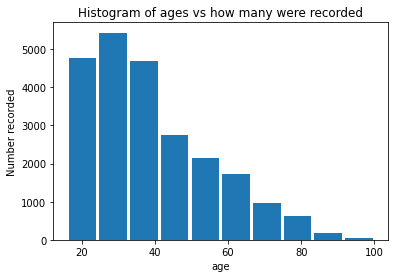

In [185]:
#Histogram of ages vs how many were recorded'
age = df['Respondent Age']
age
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('age')
plt.ylabel('Number recorded')
plt.title('Histogram of ages vs how many were recorded')
plt.show()

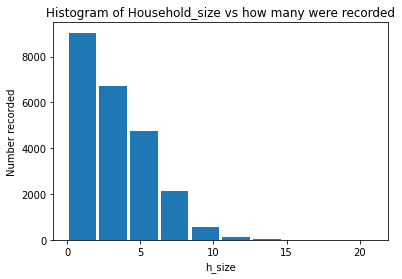

In [186]:
#Histogram of ages vs how many were recorded'
h_size = df['household_size']
age
plt.hist(h_size, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('h_size')
plt.ylabel('Number recorded')
plt.title('Histogram of Household_size vs how many were recorded')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

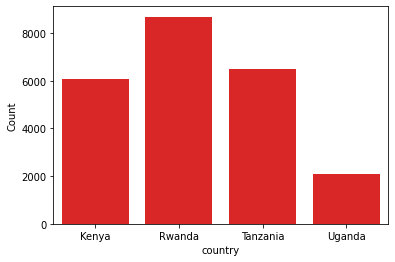

In [187]:
#Which country was recorded most
sns.countplot(df.country, color='Red',saturation=0.7)
plt.xlabel('country')
plt.ylabel('Count')

**Bivariate Analysis**

In [188]:
df['household_size'].corr(df['Respondent Age'])

-0.11970919507762415

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


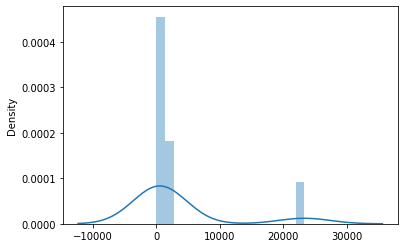

In [189]:
#Plotting univariate analysis
sns.distplot(describe)

In [190]:
Age = df['Level of Educuation'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


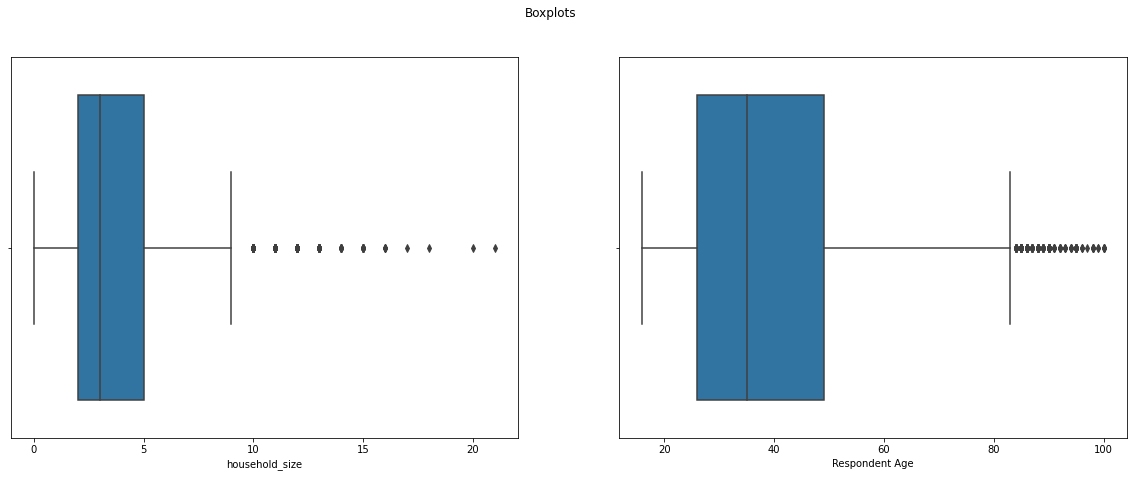

In [191]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['Respondent Age'], ax=ax2)
plt.show()

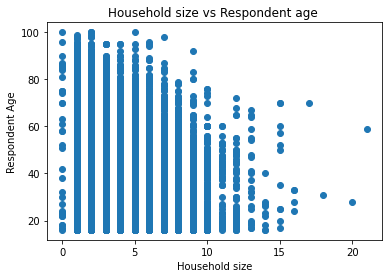

In [192]:
# Plotting bivariate analysis
plt.scatter(df['household_size'] ,df["Respondent Age"])
plt.title('Household size vs Respondent age ')
plt.xlabel('Household size')
plt.ylabel('Respondent Age')
plt.show()

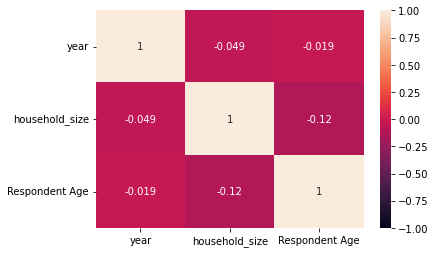

In [193]:
# Heatmap
sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1)
plt.show()

**Implementing the Solution**

**Multivarient Analysis**

a)Pricipal Component Analysis(PCA)

In [194]:
df.drop(columns='uniqueid',inplace=True)
df.drop(columns='The relathip with head',inplace=True)

In [195]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['country']=lb.fit_transform(df['country'].astype(str))
df['Type of Location']=lb.fit_transform(df['Type of Location'].astype(str))
df['Cell Phone Access']=lb.fit_transform(df['Cell Phone Access'].astype(str))
df['gender_of_respondent']=lb.fit_transform(df['gender_of_respondent'].astype(str))
df['marital_status']=lb.fit_transform(df['marital_status'].astype(str))
df['Level of Educuation']=lb.fit_transform(df['Level of Educuation'].astype(str))
df['Type of Job']=lb.fit_transform(df['Type of Job'].astype(str))

In [196]:
# Preview what our dataset
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,0,2018,Yes,0,1,3.0,24.0,0,2,4,9
1,0,2018,No,0,0,5.0,70.0,0,4,1,4
2,0,2018,Yes,1,1,5.0,26.0,1,3,6,9
3,0,2018,No,0,1,5.0,34.0,0,2,3,3
4,0,2018,No,1,0,8.0,26.0,1,3,3,5


In [197]:
for i in df.columns:
    print(i,df[i].unique())
    print("-----------------------------------------------------")

country [0 1 2 3]
-----------------------------------------------------
year [2018 2029 2056 2016 2039 2017]
-----------------------------------------------------
Has a Bank account ['Yes' 'No']
-----------------------------------------------------
Type of Location [0 1]
-----------------------------------------------------
Cell Phone Access [1 0]
-----------------------------------------------------
household_size [ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]
-----------------------------------------------------
Respondent Age [ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.

Using Reduction

Pricipal Component analysis

In [198]:
X = df.drop('Has a Bank account', 1)
y = df['Has a Bank account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [200]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [202]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 19.89% variance. 
# Similarly, the second principal component causes 16.50% variance in the dataset. 
# Collectively we can say that (19.89 + 16.50) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.19303762, 0.16842485, 0.11499698, 0.10517597, 0.09658678,
       0.08121811, 0.0750954 , 0.06534401, 0.05486853, 0.04525176])

In [203]:
#  Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [204]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Step 10: Performance Evaluation

In [205]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


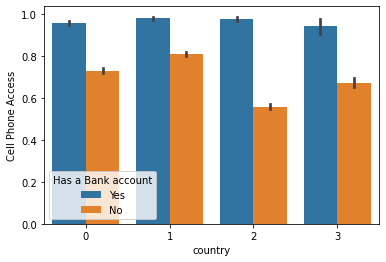

In [206]:
sns.barplot(x= 'country', y ='Cell Phone Access',data= df, hue='Has a Bank account')

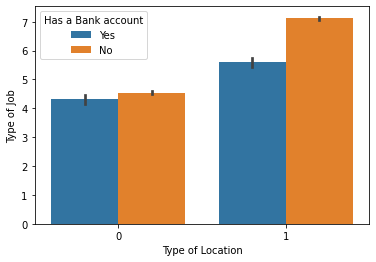

In [208]:
sns.barplot(x= 'Type of Location', y ='Type of Job',data= df, hue='Has a Bank account')

In [209]:
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'marital_status', 'Level of Educuation',
       'Type of Job'],
      dtype='object')

**7.Challanging the solution**

In [ ]:
#Challenging the solution

**8.Follow  Up Questions**

Did we have the right data
No we did not

Do we need other data to answer this question
Yes we need more details about the bank to answer this question we needed to know how many people have bank accounts from each area and the other factors in this dataset

Do we have the right question